## Logistic Regression - optimal over and undersampling

In [1]:
import warnings
warnings.filterwarnings("ignore")

# core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LogisticRegression_sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
import scipy.stats as stats


# model evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc #, plot_roc_curve



In [15]:
imb_LR_tpr = pd.read_csv('imb_LR_tpr.csv', index_col=0)
imb_LR_fpr = pd.read_csv('imb_LR_fpr.csv', index_col=0)

imb_DT_tpr = pd.read_csv('imb_DT_tpr.csv', index_col=0)
imb_DT_fpr = pd.read_csv('imb_DT_fpr.csv', index_col=0)

imb_RF_tpr = pd.read_csv('imb_RF_tpr.csv', index_col=0)
imb_RF_fpr = pd.read_csv('imb_RF_fpr.csv', index_col=0)

imb_XGB_tpr = pd.read_csv('imb_XGB_tpr.csv', index_col=0)
imb_XGB_fpr = pd.read_csv('imb_XGB_fpr.csv', index_col=0)

US_LR_tpr = pd.read_csv('US_LR_tpr.csv', index_col=0)
US_LR_fpr = pd.read_csv('US_LR_fpr.csv', index_col=0)

US_DT_tpr = pd.read_csv('US_DT_tpr.csv', index_col=0)
US_DT_fpr = pd.read_csv('US_DT_fpr.csv', index_col=0)

US_RF_tpr = pd.read_csv('US_RF_tpr.csv', index_col=0)
US_RF_fpr = pd.read_csv('US_RF_fpr.csv', index_col=0)

US_XGB_tpr = pd.read_csv('US_XGB_tpr.csv', index_col=0)
US_XGB_fpr = pd.read_csv('US_XGB_fpr.csv', index_col=0)



In [16]:
# calculate AUC for all trp-fpr pairs

# Imbalanced
imb_LR_auc = auc(imb_LR_fpr, imb_LR_tpr)
imb_DT_auc = auc(imb_DT_fpr, imb_DT_tpr)
imb_RF_auc = auc(imb_RF_fpr, imb_RF_tpr)
imb_XGB_auc = auc(imb_XGB_fpr, imb_XGB_tpr)

# Undersampling
US_LR_auc = auc(US_LR_fpr, US_LR_tpr)
US_DT_auc = auc(US_DT_fpr, US_DT_tpr)
US_RF_auc = auc(US_RF_fpr, US_RF_tpr)
US_XGB_auc = auc(US_XGB_fpr, US_XGB_tpr)


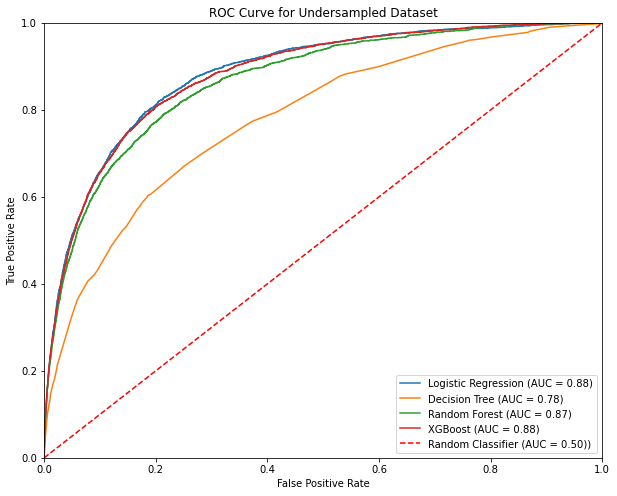

In [7]:
# use all US_tpr and US_fpr to plot ROC curves for all models into one plot, include AUC values in legend

plt.figure(figsize=(10,8))
plt.plot(US_LR_fpr, US_LR_tpr, label='Logistic Regression (AUC = %0.2f)' % US_LR_auc)
plt.plot(US_DT_fpr, US_DT_tpr, label='Decision Tree (AUC = %0.2f)' % US_DT_auc)
plt.plot(US_RF_fpr, US_RF_tpr, label='Random Forest (AUC = %0.2f)' % US_RF_auc)
plt.plot(US_XGB_fpr, US_XGB_tpr, label='XGBoost (AUC = %0.2f)' % US_XGB_auc)

plt.xlim([-0.00, 1.00])
plt.ylim([-0.00, 1.00])

plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Classifier (AUC = 0.50))')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Undersampled Dataset')
plt.legend()
plt.savefig('ROC_curve_US_all.png', dpi=300)

plt.show()




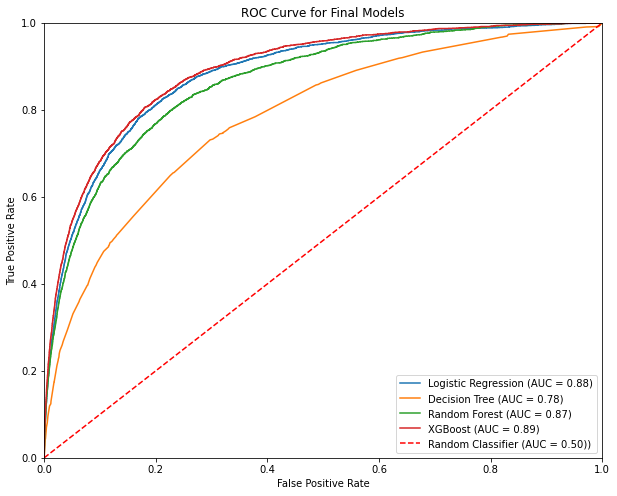

In [8]:
# use all imb_tpr and imb_fpr to plot ROC curves for all models into one plot

plt.figure(figsize=(10,8))
plt.plot(imb_LR_fpr, imb_LR_tpr, label='Logistic Regression (AUC = %0.2f)' % imb_LR_auc)
plt.plot(imb_DT_fpr, imb_DT_tpr, label='Decision Tree (AUC = %0.2f)' % imb_DT_auc)
plt.plot(imb_RF_fpr, imb_RF_tpr, label='Random Forest (AUC = %0.2f)' % imb_RF_auc)
plt.plot(imb_XGB_fpr, imb_XGB_tpr, label='XGBoost (AUC = %0.2f)' % imb_XGB_auc)

plt.xlim([-0.00, 1.00])
plt.ylim([-0.00, 1.00])

plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Classifier (AUC = 0.50))')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Models')
plt.legend()

# save plot
plt.savefig('ROC_curve_imb_all.png', dpi=300)

plt.show()




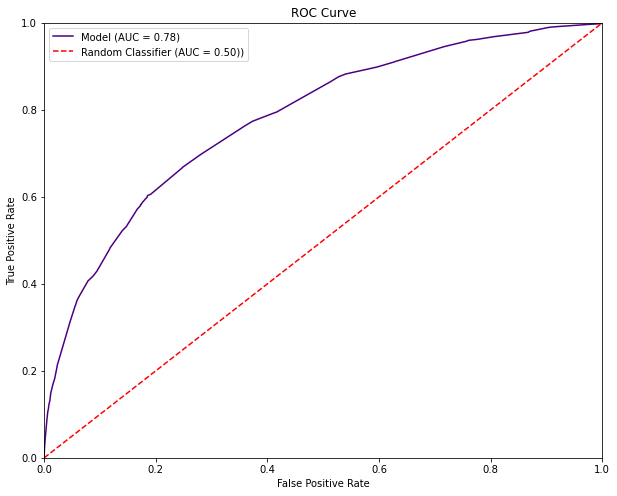

In [18]:
# a general ROC CURVE with font size 13

plt.figure(figsize=(10,8))
plt.plot(US_DT_fpr, US_DT_tpr, label='Model (AUC = %0.2f)' % US_DT_auc, color = 'indigo')


plt.xlim([-0.00, 1.00])
plt.ylim([-0.00, 1.00])

plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Classifier (AUC = 0.50))')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()



plt.savefig('ROC_curve_general.png', dpi=300)

plt.show()